In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

# Format annovar output

In [293]:
snp_files = glob.glob("/u/home/j/jzou1115/project-zarlab/CFW/confidence_interval_pipeline_out_pruned/finemapping/output/*annovar_input.txt")
print(len(snp_files))

133


In [294]:
qtls = set(pd.read_table("/u/home/j/jzou1115/project-zarlab/CFW/MegaAnalysis_CFW_Code/confidence_interval_pipeline_pruned/data/qtls_decorrelated_info90_all.txt", header=None)[0])
len(qtls)

133

In [295]:
coding = pd.read_table("/u/home/j/jzou1115/project-zarlab/CFW/confidence_interval_pipeline_out_pruned/finemapping/output/annovar_input_snps.txt.exonic_variant_function", header=None, sep="\t")


In [296]:
snpids = []
for i in coding.index:
    snpid = coding.loc[i, 3]+"_"+str(coding.loc[i, 4])
    snpids.append(snpid)
coding["snpid"] = snpids

In [297]:
intergenic = pd.read_table("/u/home/j/jzou1115/project-zarlab/CFW/confidence_interval_pipeline_out_pruned/finemapping/output/annovar_input_snps.txt.variant_function",sep="\t", header=None)
snpids = []
for i in intergenic.index:
    snpid = intergenic.loc[i, 2]+"_"+str(intergenic.loc[i, 3])
    snpids.append(snpid)
intergenic["snpid"] = snpids

In [298]:
coding_snps = set(coding["snpid"])
noncoding_snps = set(intergenic["snpid"])
print(len(coding_snps), len(noncoding_snps))

113 20663


In [315]:
output = {}
output["QTL"] = []
output["SNP"] = []
output["type"] = []
output["annovar"] = []

#check for coding mutations
for qtl in qtls:
#for qtl in ["activity.begin.11.93418612"]:
    f = "/u/home/j/jzou1115/project-zarlab/CFW/confidence_interval_pipeline_out_pruned/finemapping/output/"+qtl+"_annovar_input.txt"
    if os.stat(f).st_size == 0:
        continue
    snps = pd.read_table(f, header=None)
    
    d = os.path.dirname(f)
    
    snpids = []
    qtl_tokens = qtl.split(".")
    snpids.append("chr"+str(qtl_tokens[-2])+"_"+str(qtl_tokens[-1]))
    for i in snps.index:
        chrm = str(snps.loc[i, 0])
        pos = str(snps.loc[i, 1])
        snpids.append(chrm+"_"+pos)
    
    snpids = list(set(snpids))
    for snpid in snpids:
        
        if snpid in coding_snps:
            sub = coding[coding["snpid"]==snpid]
            for j in sub.index:
                output["QTL"].append(qtl)
                output["SNP"].append(snpid)
                output["type"].append(str(coding.loc[j,1]))
                output["annovar"].append(str(coding.loc[j,2]))

        elif snpid in noncoding_snps:
            #print(snpid)
            sub = intergenic[intergenic["snpid"]==snpid]
            
            for j in sub.index:
                output["QTL"].append(qtl)
                output["SNP"].append(snpid)
                output["type"].append(str(intergenic.loc[j,0]))
                output["annovar"].append(str(intergenic.loc[j,1]))
        else:
            #print(snpid)
            output["type"].append("NA")
            output["annovar"].append("NA")
            output["QTL"].append(qtl)
            output["SNP"].append(snpid)             
         

In [316]:
output = pd.DataFrame(output)
output.head()

,QTL,SNP,type,annovar
0,soleus.13.9242435,chr13_9071094,intergenic,"Gtpbp4(dist=75082),Larp4b(dist=22787)"
1,soleus.13.9242435,chr13_9062594,intergenic,"Gtpbp4(dist=66582),Larp4b(dist=31287)"
2,soleus.13.9242435,chr13_9184117,intergenic,"Larp4b(dist=9666),Dip2c(dist=92408)"
3,soleus.13.9242435,chr13_9178542,intergenic,"Larp4b(dist=4091),Dip2c(dist=97983)"
4,soleus.13.9242435,chr13_9189522,intergenic,"Larp4b(dist=15071),Dip2c(dist=87003)"


In [317]:
set(output["type"])

{'NA',
 'UTR3',
 'UTR5',
 'downstream',
 'intergenic',
 'intronic',
 'ncRNA_exonic',
 'ncRNA_intronic',
 'ncRNA_splicing',
 'nonsynonymous SNV',
 'stopgain',
 'synonymous SNV',
 'upstream',
 'upstream;downstream'}

In [318]:
output.shape

(133562, 4)

In [319]:
output.to_csv("/u/home/j/jzou1115/project-zarlab/CFW/confidence_interval_pipeline_out_pruned/finemapping/output/susier_sets_annovar.txt", sep="\t", index=False)

In [320]:
nonsyn = output[output["type"]=="nonsynonymous SNV"]
nonsyn.shape

(165, 4)

In [321]:
nonsyn

,QTL,SNP,type,annovar
1493,TA.11.88973232,chr11_89055474,nonsynonymous SNV,"Dgke:NM_001362845:exon2:c.G499T:p.G167C,Dgke:N..."
1494,TA.11.88973232,chr11_89055474,nonsynonymous SNV,"Dgke:NM_001362845:exon2:c.G499A:p.G167S,Dgke:N..."
11029,basal.activity.11.95673447,chr11_96758653,nonsynonymous SNV,"Skap1:NM_001177898:exon11:c.G950A:p.R317H,"
11030,basal.activity.11.95673447,chr11_96758653,nonsynonymous SNV,"Skap1:NM_001177898:exon11:c.G950A:p.R317H,"
11031,basal.activity.11.95673447,chr11_96758653,nonsynonymous SNV,"Skap1:NM_001177898:exon11:c.G950T:p.R317L,"
...,...,...,...,...
133320,weight.17.37094289,chr17_34183092,nonsynonymous SNV,"Psmb9:NM_013585:exon5:c.G529A:p.D177N,"
133321,weight.17.37094289,chr17_34183092,nonsynonymous SNV,"Psmb9:NM_013585:exon5:c.G529A:p.D177N,"
133349,weight.17.37094289,chr17_37093791,nonsynonymous SNV,"Olfr91:NM_182714:exon1:c.G82T:p.V28F,"
133522,weight.17.37094289,chr17_34137368,nonsynonymous SNV,"H2-DMa:NM_001360530:exon3:c.A343C:p.K115Q,H2-D..."


In [322]:
nonsyn.to_csv("/u/home/j/jzou1115/project-zarlab/CFW/confidence_interval_pipeline_out_pruned/finemapping/output/susier_sets_annovar_nonsyn.txt", sep="\t", index=False)

In [323]:
len(set([g.split(":")[0] for g in nonsyn["annovar"]]))

37

In [332]:
len(set(output[output["type"]=="intergenic"]["SNP"]))

14679

In [333]:
len(set(output[output["type"]=="intronic"]["SNP"]))

4667

In [334]:
len(set(output[output["type"]=="NA"]["SNP"]))

43

In [335]:
len(set(output["SNP"]))

20706

In [336]:
(14679+4667+43)/20706 # 94% in noncoding regions of the genome

0.9363952477542741

In [337]:
len(set(output[output["type"]=="nonsynonymous SNV"]["SNP"]))

42

# analyze annovar output

In [338]:
df = pd.read_table("/u/home/j/jzou1115/project-zarlab/CFW/confidence_interval_pipeline_out_pruned/finemapping/output/susier_sets_annovar.txt")

In [339]:
phenotypes = []
for i in df.index:
    qtl = df.loc[i, "QTL"]
    tokens = qtl.split(".")
    pheno = ".".join(tokens[:-2])
    phenotypes.append(pheno)
    
df["phenotype"] = phenotypes

In [340]:
df.head()

,QTL,SNP,type,annovar,phenotype
0,soleus.13.9242435,chr13_9071094,intergenic,"Gtpbp4(dist=75082),Larp4b(dist=22787)",soleus
1,soleus.13.9242435,chr13_9062594,intergenic,"Gtpbp4(dist=66582),Larp4b(dist=31287)",soleus
2,soleus.13.9242435,chr13_9184117,intergenic,"Larp4b(dist=9666),Dip2c(dist=92408)",soleus
3,soleus.13.9242435,chr13_9178542,intergenic,"Larp4b(dist=4091),Dip2c(dist=97983)",soleus
4,soleus.13.9242435,chr13_9189522,intergenic,"Larp4b(dist=15071),Dip2c(dist=87003)",soleus


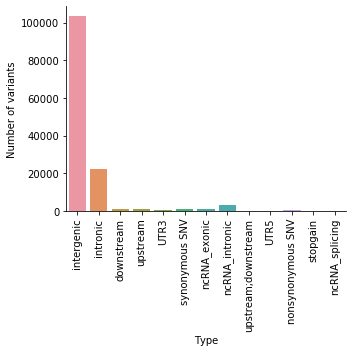

In [341]:
ax = sns.catplot("type", data=df, kind="count")
ax.set_xticklabels(rotation=90)
plt.xlabel("Type")
plt.ylabel("Number of variants")
plt.tight_layout()
plt.savefig("/u/home/j/jzou1115/project-zarlab/CFW/confidence_interval_pipeline_out_pruned/finemapping/output/num_variants_by_type.png")

In [350]:
nonsyn = df[df["type"]=="nonsynonymous SNV"]
nonsyn_genes = set([g.split(":")[0] for g in nonsyn["annovar"]])
print(nonsyn_genes)
print(len(nonsyn_genes))

{'Zfyve1', 'Cftr', 'Zc3h15', 'Olfr995', 'Nos3', 'Ppfibp1', 'Olfr1087', 'Skap1', 'Pnpo', 'Isl1', 'Slc26a5', 'H2-DMa', 'Itga2', 'Psmb9', 'Dgke', 'Gm11545', 'Mocs2', 'Celsr1', 'Ngfr', 'Irak1bp1', 'Olfr1094', 'Smad1', 'Idi1', 'Copz2', 'Mmp24', 'Olfr1096-ps1', 'Prg3', 'Olfr1089', 'Olfr91', 'Fads2b', 'Dhx29', 'Sp2', 'Ttll6', 'Tmem92', 'Olfr1260', 'Rint1', 'Cdc20b'}
37


In [351]:
def parseGenes(d):
    genes = []
    for i in d.index:
        a = str(d.loc[i, "annovar"])
        t = str(d.loc[i, "type"])

        if t=="upstream" or t=="downstream" or  t=="UTR3" or t=="UTR5":
            tokens = a.split("(")
            genes.append(tokens[0])
        elif t=='upstream;downstream':
            tokens = a.split(";")
            for g in tokens:
                tokens2 = g.split("(")
                genes.append(tokens2[0].split(":")[0])
        if t=='nonsynonymous SNV' or t =='synonymous SNV' or t =="stopgain":
            tokens = a.split(",")
            for g in tokens[:-1]:
                genes.append(g.split(":")[0])
        elif t=="intronic":
            genes.append(a)
        elif pd.isnull(t):
            continue
        else:
            tokens = a.split(",")
            for g in tokens:
                tokens2 = g.split("(")
                genes.append(tokens2[0])
                
    return genes

    

In [352]:
for pheno in set(phenotypes):
    if pd.isnull(pheno):
        continue
    print(pheno)
    d = df[df["phenotype"]==pheno]
    genes = parseGenes(d)
    outfile = open("/u/home/j/jzou1115/project-zarlab/CFW/confidence_interval_pipeline_out_pruned/finemapping/output/GO/"+pheno+"_annovar_genes_unique.txt", "w")
    genes = set(genes)
    for g in genes:
        outfile.write(g+"\n")
    outfile.close()

activity.begin
activity5
glucose
basal.activity
tail.length
weight
soleus
tibia
habit.ratio
plantaris
activity30
activity.total
TA
activity.end
EDL
bmd
weight.bmi.tibia
gastroc
bmd.a
activity.middle
bmd.n


# compare old and new annovar input

In [86]:
old = pd.read_table("/u/home/j/jzou1115/project-zarlab/CFW/confidence_interval_pipeline_out_pruned/finemapping/output/annovar_input_snps_old.txt", header=None)
old.shape

(3161, 5)

In [87]:
new = pd.read_table("/u/home/j/jzou1115/project-zarlab/CFW/confidence_interval_pipeline_out_pruned/finemapping/output/annovar_input_snps.txt", header=None)
new.shape

(35126, 5)

In [88]:
old.head()

,0,1,2,3,4
0,chr17,34005593,34005593,G,A
1,chr17,34239934,34239934,T,G
2,chr17,34056484,34056484,G,A
3,chr17,34101337,34101337,G,C
4,chr17,34125635,34125635,T,C


In [92]:
snps = []
for i in old.index:
    chrm = str(old.loc[i, 0])
    bp = str(old.loc[i, 1])
    snp = chrm+"_"+bp
    snps.append(snp)
old["SNP"] = snps

In [93]:
snps = []
for i in new.index:
    chrm = str(new.loc[i, 0])
    bp = str(new.loc[i, 1])
    snp = chrm+"_"+bp
    snps.append(snp)
new["SNP"] = snps

In [94]:
len(set(old["SNP"]))

3161

In [95]:
len(set(new["SNP"]))

20663

In [96]:
len(set(old["SNP"]).intersection(set(new["SNP"])))

3161

In [118]:
old = open("/u/home/j/jzou1115/project-zarlab/CFW/confidence_interval_pipeline_out_pruned/finemapping/output/annovar_input_snps_old.txt", "r")
old_lines = old.readlines()
old.close()

In [119]:
new = open("/u/home/j/jzou1115/project-zarlab/CFW/confidence_interval_pipeline_out_pruned/finemapping/output/annovar_input_snps.txt", "r")
new_lines = new.readlines()
new.close()

In [120]:
len(set(old_lines).intersection(set(new_lines)))


998

In [121]:
len(set(old_lines))

3161

In [122]:
len(set(new_lines))

30977

# take closer look at nonsynonymous mutations

In [98]:
len(set(nonsyn["SNP"]))

113

In [99]:
genes = [str(g).split(":")[0] for g in nonsyn["annovar"]]

In [101]:
len(set(genes))

2

In [103]:
nonsyn

,QTL,SNP,type,annovar
0,soleus.13.9242435,chr13_9151127,nonsynonymous SNV,"Olfr1260:NM_146981:exon1:c.C603A:p.S201R,"
1,soleus.13.9242435,chr13_9151127,nonsynonymous SNV,"Skap1:NM_001177898:exon11:c.G950A:p.R317H,"
2,TA.11.88973232,chr11_89055474,nonsynonymous SNV,"Olfr1260:NM_146981:exon1:c.C603A:p.S201R,"
3,EDL.12.83885241,chr12_83783672,nonsynonymous SNV,"Olfr1260:NM_146981:exon1:c.C603A:p.S201R,"
4,bmd.11.100053320,chr11_97022116,nonsynonymous SNV,"Olfr1260:NM_146981:exon1:c.C603A:p.S201R,"
...,...,...,...,...
458,weight.17.37094289,chr17_37086038,nonsynonymous SNV,"Olfr1260:NM_146981:exon1:c.C603A:p.S201R,"
459,weight.17.37094289,chr17_37086038,nonsynonymous SNV,"Skap1:NM_001177898:exon11:c.G950A:p.R317H,"
460,weight.17.37094289,chr17_34205603,nonsynonymous SNV,"Olfr1260:NM_146981:exon1:c.C603A:p.S201R,"
461,weight.17.37094289,chr17_34137368,nonsynonymous SNV,"Olfr1260:NM_146981:exon1:c.C603A:p.S201R,"
